<h1>Drug Classification</h1>

Author: Mailson Vieira Passos

<h2>About the data</h2>

The dataset can be encountered on <a href='https://www.kaggle.com/datasets/prathamtripathi/drug-classification'>Kaggle</a>\
The dataset consists of data collected from a group of patients, all of whom suffered from a known illness. Each patient received treatment with five different medicines: drugA, drugB, drugC, drugX, and drugY.  
The features assessed are listed below: 
<ul>
    <li><b>Age</b></li>
    <li><b>Sex</b>: F or M</li>
    <li><b>Blood Pressure</b>: Low, Medium or High</li>
    <li><b>Cholesterol</b>: level of cholesterol. It ranges from Low to High</li>
    <li><b>Na_to_K</b>: sodium to potassium ratio </li>
    <li><b>Drug</b>: drug that each patient responded to</li>
</ul>

<h2>Objective</h2>

My goal is to build a model to find out which drug is accurate for each pacient.

<h2>Requirements</h2>

For this notebook, I am using
```python
!pip install pandas==2.0.0
!pip install numpy==1.26.1
!pip install matplotlib==1.26.13.8.0
!pip install seaborn==0.13.2
!pip install scipy==1.11.3  
!pip install scikit-learn==1.4.1.post1 
```

In [61]:
from support.nb_scpts import display_side_by_side

import numpy as np 
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('data/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [45]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

First of all, we can see that Drug column contains the drug in different formats. Let's standardize drug converting all drugs into lowercase and the last letter uppercase.

In [46]:
df['Drug'] = df['Drug'].apply(lambda x: x[:-1].lower() + x[-1].upper())

Let's now have a general outline of the data

In [47]:
df.shape

(200, 6)

We have 6 features and 200 instances

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


and we also check for missing data

In [49]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

So, we don't have any missing data

In [50]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [51]:
df[['Age', 'Na_to_K']].mode()

,Age,Na_to_K
0,47.0,12.006
1,NaN,18.295


From the above table, Age mean is 45, which is approximately equal to the median and it does not differ much to the mode.  Na_to_K is bimodal and it is probabily right-skewed. Let's visualize how the age and Na_to_K distribution.

<Axes: xlabel='Na_to_K', ylabel='Count'>

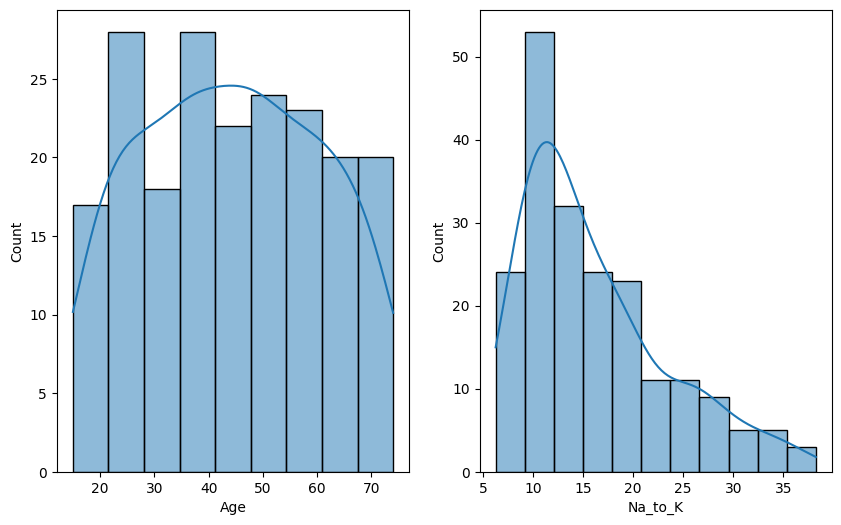

In [52]:
fig, axs = plt.subplots(1, 2, figsize = (10, 6))
sns.histplot(data = df, x = 'Age', kde = True, ax = axs[0])
sns.histplot(data = df, x = 'Na_to_K', kde = True, ax = axs[1])

The Na_to_K distribution is skewed to the right. The age distribution looks 'approximately' like a uniform distribution.

In [53]:
df.describe(include = 'object')

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,drugY
freq,104,77,103,91


The most frequent Sex is male, Blood Pressure is high, Cholesterol is high, and the drug most pacients responded to was drugY. Let's investigate this further

In [54]:
display_side_by_side(
    [df[ob_col].value_counts().to_frame() for ob_col in df.select_dtypes('object').columns],
    df.select_dtypes('object').columns,
    15
)

,count
Sex,
M,104
F,96
,count
BP,
HIGH,77
LOW,64
NORMAL,59
,count
Cholesterol,


Overall, we have a well balanced dataset, with the exception of `drug`, which is moderately unbalanced. Let's check Age x Drug

<Axes: xlabel='Drug', ylabel='Age'>

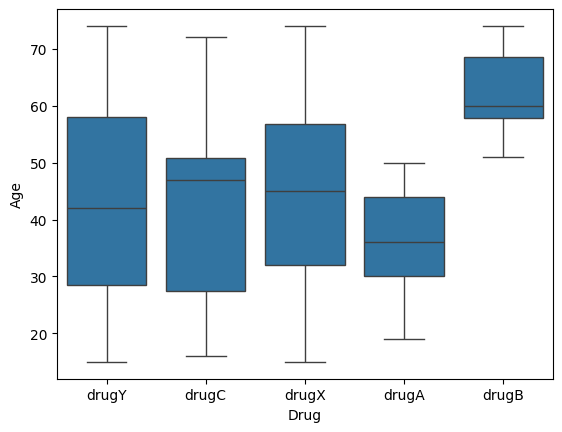

In [55]:
sns.boxplot(data = df, x = 'Drug', y = 'Age')

From this plot we can see that DrugB was the drug people with advanced age responded the most. The boxplots also indicate a possible association between drug and age.

In [57]:
groups = df.groupby('Drug')['Age']
kruskal(*[group for name, group in groups])

KruskalResult(statistic=26.094152264442048, pvalue=3.029094113579067e-05)

The p-value is significant, so we reject the null hypothesis and conclude that at least one group has a different median. 

<Axes: xlabel='Drug', ylabel='Na_to_K'>

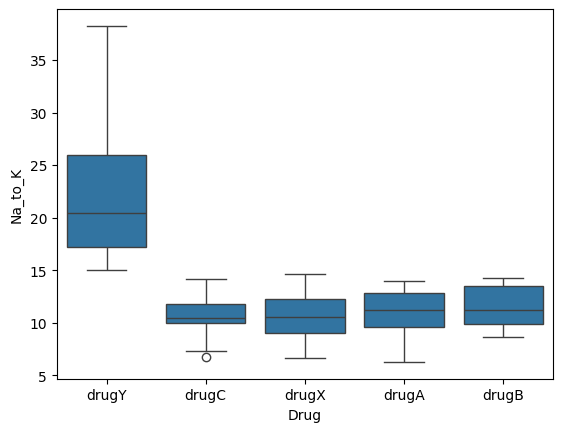

In [14]:
sns.boxplot(data = df, x ='Drug', y = 'Na_to_K')

We can see that people who responded the most with drugY have a higher sodium to potassium ration in their blood. There's a possible association between Na_to_K and Drug. 

In [58]:
groups = df.groupby('Drug')['Na_to_K']
kruskal(*[group for name, group in groups])

KruskalResult(statistic=148.65809838778824, pvalue=3.946994995681044e-31)

The KruskalWallis agree with our assessment.

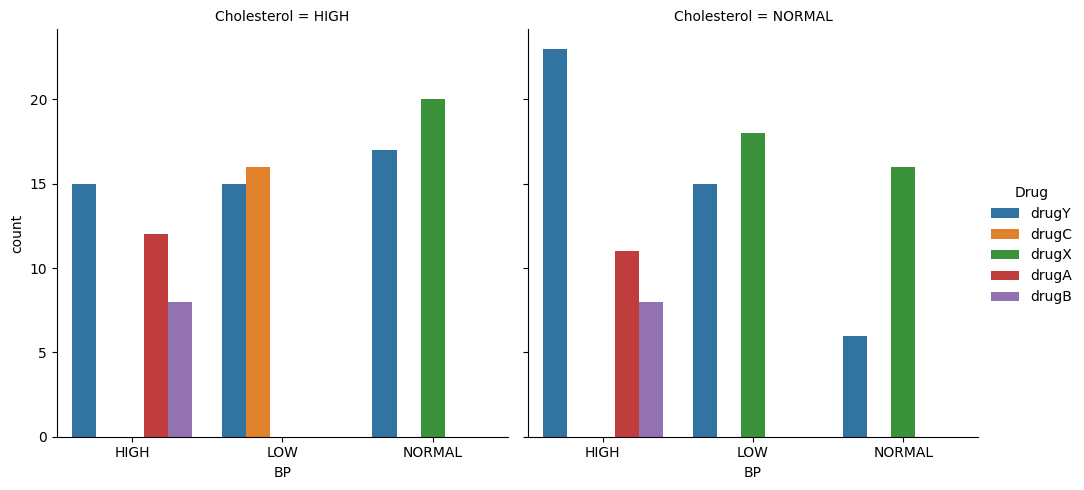

In [15]:
sns.catplot(data = df, x = 'BP', kind = 'count', hue = 'Drug', col = 'Cholesterol')

People with normal blood pressure responded to drugY or drugX, independently of their cholesterol’s levels. For people with low colesterol levels, we see that .We can also see that drugB was only prescribed to people with high blood pressure and we know that those people have advanced age in general. Moreover, people who had low blood pressure may have taken drugC or drugX depending on their cholesterol's level, but drugY was prescribed without regarding this condition.

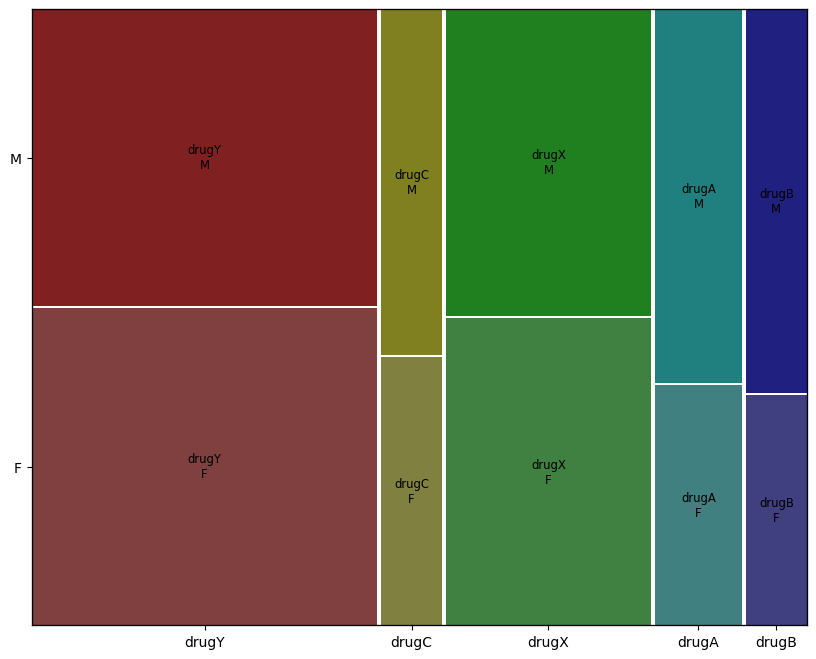

In [23]:
from statsmodels.graphics.mosaicplot import mosaic

fig, ax = plt.subplots(figsize = (10,8))
mosaic(df, ['Drug', 'Sex'], ax = ax)
plt.show()

Sex does not seem to have a significant association with drug. Let's do a chi-square test to assess if there is an association between those features.

In [24]:
bp_drug = pd.crosstab(
    index = df['Sex'],
    columns = df['Drug']
)

chi2, p, dof, expected = stats.chi2_contingency(bp_drug)
print(f'chi2 = {chi2}, pval = {p}')

chi2 = 2.119248418109203, pval = 0.7138369773987128


Therefore, we don't reject the null hypothesis and conclude that there is no association between drug and sex.

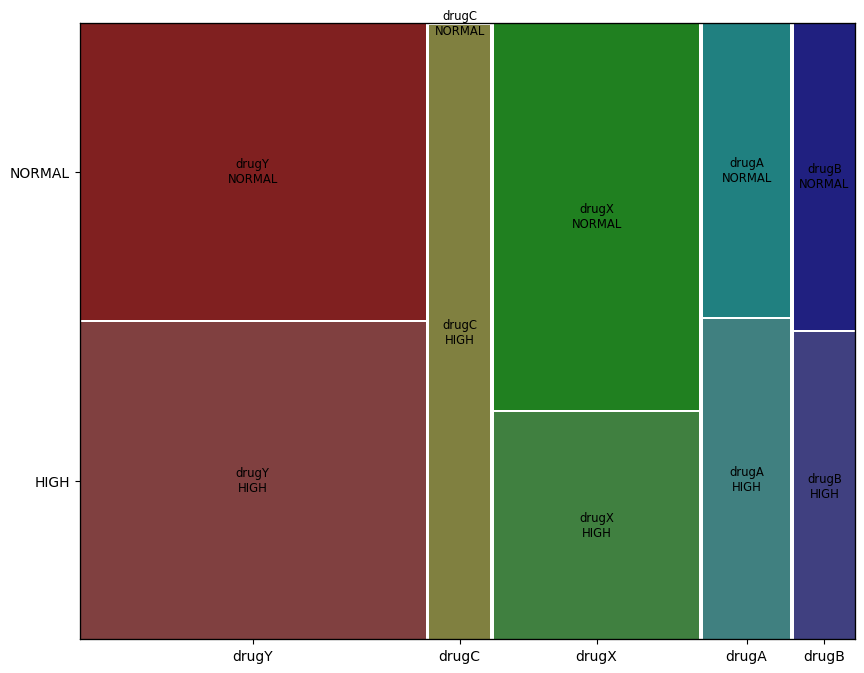

In [26]:
fig, ax = plt.subplots(figsize = (10,8))
mosaic(df, ['Drug', 'Cholesterol'], ax = ax)
plt.show()

We see that there is probably an association between blood pressure and drug

In [27]:
bp_drug = pd.crosstab(
    index = df['Cholesterol'],
    columns = df['Drug']
)

chi2, p, dof, expected = stats.chi2_contingency(bp_drug)
print(f'chi2 = {chi2}, pval = {p}')

chi2 = 19.609657681313468, pval = 0.0005962588389856515


We reject the null hypothesis and we conclude that there is an association between cholesterol and drug

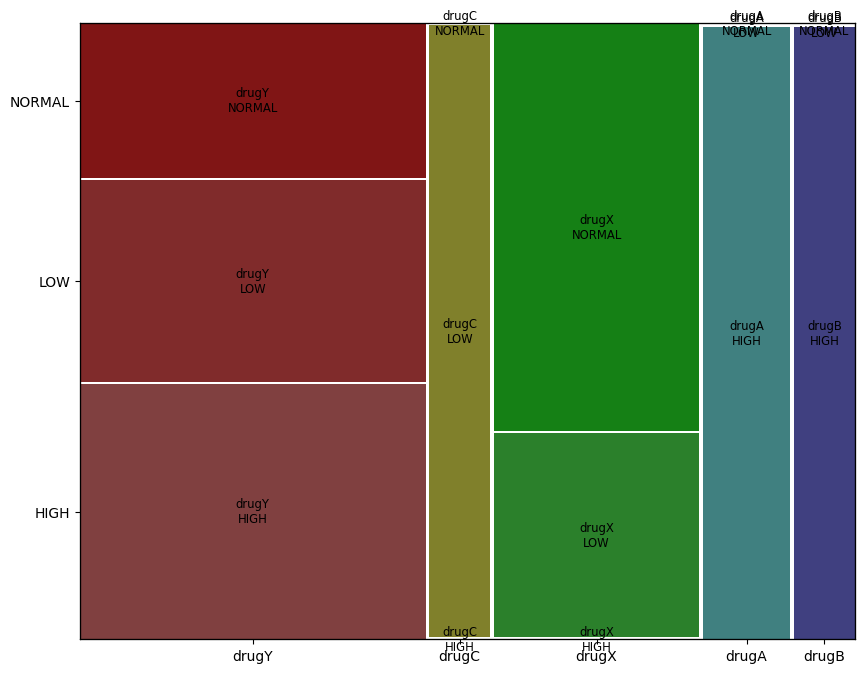

In [28]:
fig, ax = plt.subplots(figsize = (10,8))
mosaic(df, ['Drug', 'BP'], ax = ax)
plt.show()

In [21]:
bp_drug = pd.crosstab(
    index = df['BP'],
    columns = df['Drug']
)

chi2, p, dof, expected = stats.chi2_contingency(bp_drug)
print(f'chi2 = {chi2}, pval = {p}')

chi2 = 143.23287184969993, pval = 5.041733414466518e-27


We conclude that there is an association between drug an blood pressure.

<Axes: xlabel='Na_to_K', ylabel='Age'>

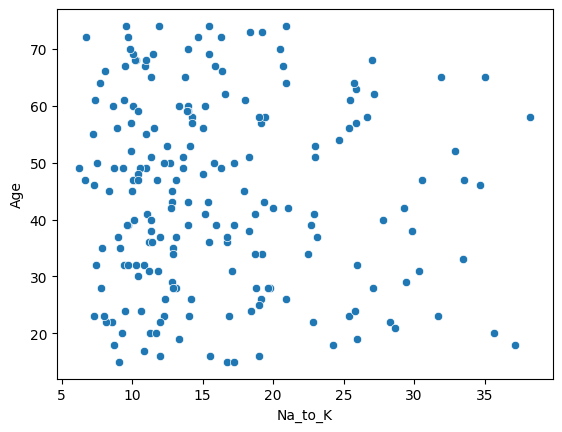

In [22]:
sns.scatterplot(data = df, x = 'Na_to_K', y = 'Age')

There is no association between age and Na_to_K, which is really good!

<h3>Preprocessing</h3>

Let's create the predictors matrix and the target vector

In [22]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [23]:
predictors = ['Sex', 'BP', 'Cholesterol', 'Age', 'Na_to_K']
le = LabelEncoder()

In [24]:
X = df[predictors]
y = le.fit_transform(df['Drug'].to_numpy())

As Sex, BP, Cholesterol are a categorical features, we need to turn them into numerical values so they can be used in the model

In [25]:
cat_cols = predictors[:3]
transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cat_cols)  
    ],
    remainder='passthrough'  
)
X = transformer.fit_transform(X)

In [26]:
feat_names = transformer.get_feature_names_out()

We don't have too many features, and in this case, interpretability is important. So I'll start by modeling a decision tree to see how it performs. We can compare it to other models later.

<h2>Modeling</h2>

Let's build the model. 
I have preference for decision tree, due to its interpretability. In case it does not perform well, I am going to look for other models.

In [27]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import tree
import graphviz

We are going split in a way that ensures minority classes are not over-penalized.

In [28]:
skf_out = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_in = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scores = np.empty(10)
params = {
    'class_weight': ['balanced', None],
    'criterion': ['gini', 'entropy'],
    'max_depth': list(np.arange(1, 10)) + [None],
}

In [29]:
for i, (train_idx, test_idx) in enumerate(skf_out.split(X, y)):
    X_train, X_test = X[train_idx,:], X[test_idx,:]
    y_train, y_test = y[train_idx], y[test_idx]
    
    tree_clf = tree.DecisionTreeClassifier()
    clf = GridSearchCV(tree_clf, param_grid = params, cv = skf_in, scoring='roc_auc_ovr', refit = True)
    clf.fit(X_train,y_train.ravel())
    print('fold %i \n\tbest parameters: %s' %(i + 1, clf.best_params_))
    scores[i] = clf.best_score_
    print('\taccuracy: %f' %(clf.best_score_ * 100))
    print('\tvalidation acc %f' %(clf.best_estimator_.score(X_test, y_test)))

fold 1 
	best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4}
	accuracy: 98.970833
	validation acc 1.000000
fold 2 
	best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4}
	accuracy: 98.970833
	validation acc 1.000000
fold 3 
	best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4}
	accuracy: 99.270833
	validation acc 1.000000
fold 4 
	best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4}
	accuracy: 99.270833
	validation acc 0.950000
fold 5 
	best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4}
	accuracy: 98.282543
	validation acc 1.000000
fold 6 
	best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4}
	accuracy: 98.970833
	validation acc 1.000000
fold 7 
	best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4}
	accuracy: 99.700000
	validation acc 0.950000
fold 8 
	best parameters: {'class_

We have our best overall parameter. We won't need to look for other models as this is the preferred one and it performs exceptionally well!

In [30]:
tree_clf = tree.DecisionTreeClassifier()
gridsrch_mod = GridSearchCV(
    estimator=tree_clf,
    param_grid=params,
    scoring='roc_auc_ovr',
    n_jobs=-1,
    cv=skf_in,
    verbose=1,
    refit=True
)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=0,
    stratify=y,
    shuffle = True
)
gridsrch_mod.fit(X_train, y_train)
print('Best CV accuracy: %.2f%%' % (gridsrch_mod.best_score_*100))
print('Best parameters:', gridsrch_mod.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best CV accuracy: 98.50%
Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4}


In [32]:
yhat = gridsrch_mod.predict(X_test)

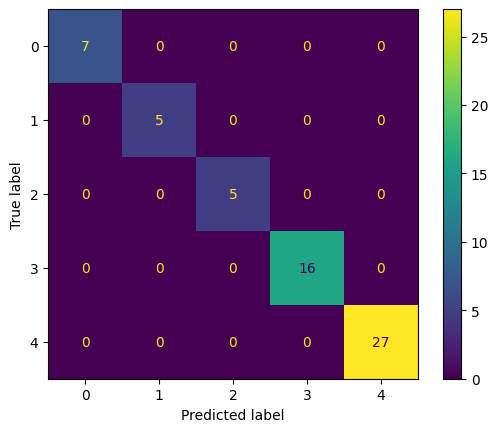

In [33]:
disp = metrics.ConfusionMatrixDisplay(
    metrics.confusion_matrix(yhat, y_test))
disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.grid(False)
plt.show()

We don't have false negatives. 

In [34]:
print('accuracy', metrics.accuracy_score(y_test, yhat))
print('precision',  metrics.precision_score(y_test, yhat, average = 'weighted'))
print('recall', metrics.recall_score(y_test, yhat, average = 'weighted'))

accuracy 1.0
precision 1.0
recall 1.0


In [35]:
splitter = lambda s: s.split('__')[-1]
splitter_func = np.vectorize(splitter)

[]

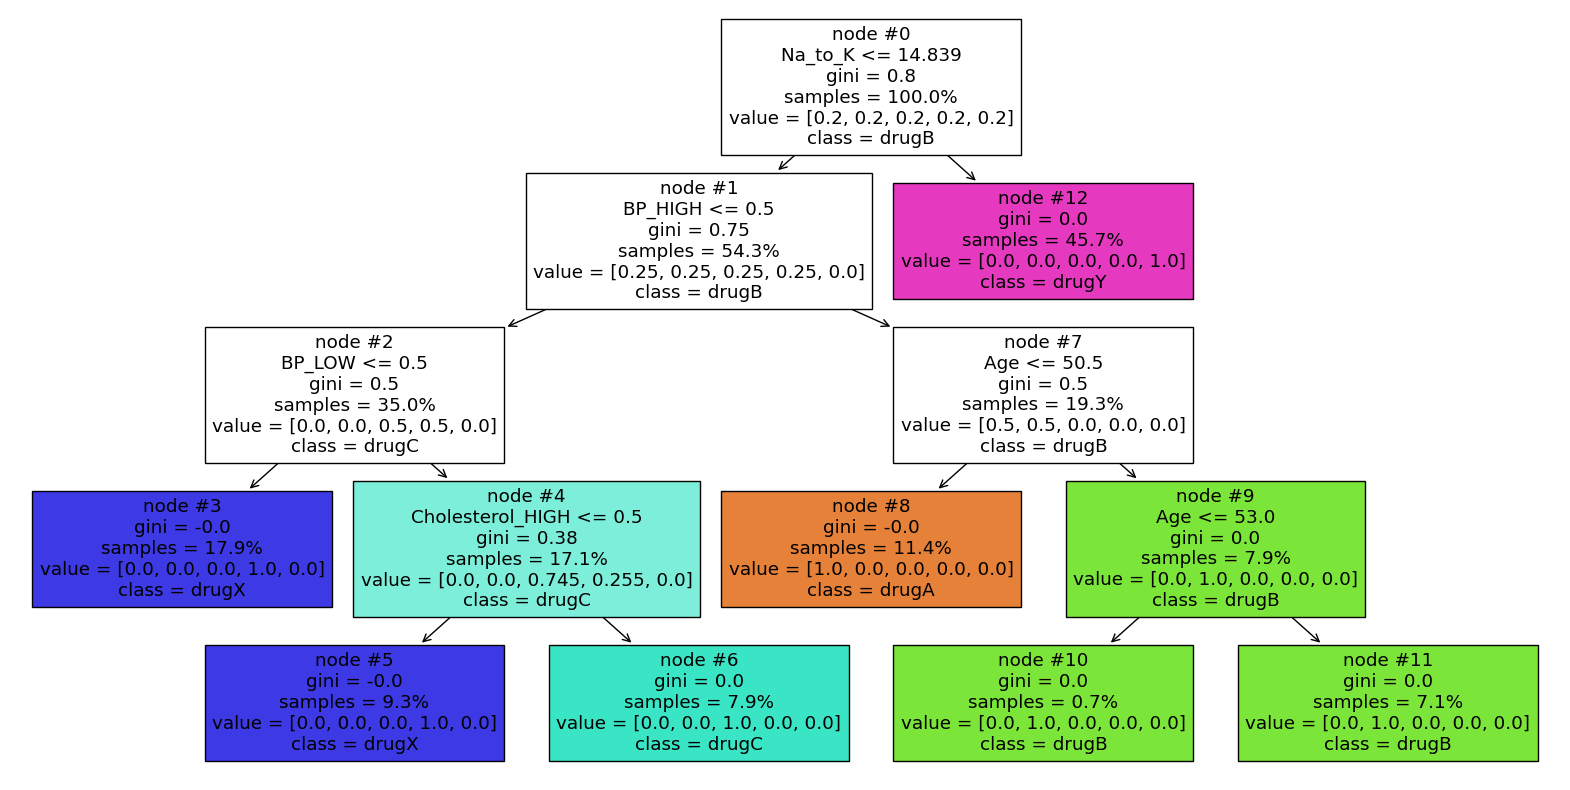

In [36]:
plt.figure(figsize = (20, 10))
tree.plot_tree(
    gridsrch_mod.best_estimator_,
    feature_names=splitter_func(feat_names),
    class_names=le.inverse_transform(np.unique(y)),
    filled=True,
    node_ids=True,
    label="all",
    proportion=True,
)
plt.plot()

From the decision tree, we can see that the key factor influencing a patient's response to Drug Y is a sodium-to-potassium ratio greater than 14.8. This alligns with the results we got earlier while exploring the data. Another relevant finding is that individuals with high blood pressure and age below 50 are more likely to respond to Drug A, whereas those aged above 55.5 are likely to responde to Drug B. On the other hand, if a person has a low sodium-to-potassium ratio, low blood pressure, and low cholesterol, they tend to respond to Drug C.

An important aspect of decision trees is their ability to rank features by importance. From the plot we can see that Na_to_K, BP_HIGH and Age are important in reducing the gini impurity. Let's rank them.

In [37]:
pd.DataFrame(
    {name:score for name, score in zip(splitter_func(feat_names), gridsrch_mod.best_estimator_.feature_importances_)},
    index = ['scores']
).T.sort_values(by = 'scores', ascending=False)

,scores
Age,0.250000
BP_HIGH,0.250000
Na_to_K,0.250000
Cholesterol_HIGH,0.127451
BP_LOW,0.122549
Sex_F,0.000000
Sex_M,0.000000
BP_NORMAL,0.000000
Cholesterol_NORMAL,0.000000


Age, BP_HIGH and Na_to_K are tied as the most important features. Earlier, we saw that there was no association between sex and drug. This is reflected on our decision tree, where `Sex` did not contribute to reducing impurity.

In [38]:
gridsrch_mod.best_estimator_.score(X, y)

1.0

We save the final model.

In [39]:
import joblib

final_mod = tree.DecisionTreeClassifier(**gridsrch_mod.best_params_).fit(X, y)
joblib.dump(final_mod, 'drug_pred.joblib')

['drug_pred.joblib']